# Machine Learning with Linear Regression

This project is the first in a series of Machine Learning micro projects. These small projects demonstrate how we can use scikit-learn to create ML models in python, dealing with a variety of datasets.

For this project, we have a dataset from Kaggle - 'Honey Production in the USA (1998-2012)' which gives Honey Production Figures and Prices by National Agricultural Statistics Service. 
(link: https://www.kaggle.com/jessicali9530/honey-production)

As we have already heard, the honeybees are in a precarious state right now. We have seen articles about the decline of the honeybee population for various reasons. We want to investigate this decline and how the trends of the past predict the future for the honeybees.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Bad key "text.kerning_factor" on line 4 in
C:\Users\Parnashri\Anaconda_3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


<h3>Data</h3>

The dataset contains the US states, yield per state, Total production for each state, the stocks, price of honey and production value. But as this is a regression project, we'll deal with these numerical features:

stocks: Value of stocks for each US state
totalprod: Total production of honey for each US state
year: Value of year

In [2]:
df = pd.read_csv('honeyproduction.csv')

In [3]:
df.head(10)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
5,FL,230000.0,98,22540000.0,4508000.0,0.64,14426000.0,1998
6,GA,75000.0,56,4200000.0,307000.0,0.69,2898000.0,1998
7,HI,8000.0,118,944000.0,66000.0,0.77,727000.0,1998
8,ID,120000.0,50,6000000.0,2220000.0,0.65,3900000.0,1998
9,IL,9000.0,71,639000.0,204000.0,1.19,760000.0,1998


In [4]:
df.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02,626.000000
mean,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06,2004.864217
std,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06,4.317306
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05,2001.000000
50%,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06,2005.000000
75%,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06,2009.000000
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,4.150000,6.961500e+07,2012.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


<h3>Exploratory Analysis</h3>

Before we begin fitting a linear regression model on the data, let's try and eyeball it first.

Visualising the relationship between stocks and year.

In [6]:
stocks_per_year = df.groupby('year').stocks.mean().reset_index()
print(stocks_per_year)

    year        stocks
0   1998  1.873605e+06
1   1999  1.823023e+06
2   2000  1.975721e+06
3   2001  1.471909e+06
4   2002  8.903864e+05
5   2003  9.231591e+05
6   2004  1.487341e+06
7   2005  1.516756e+06
8   2006  1.469146e+06
9   2007  1.278171e+06
10  2008  1.243805e+06
11  2009  9.330500e+05
12  2010  1.119925e+06
13  2011  9.137500e+05
14  2012  7.915500e+05


In [7]:
Xs = stocks_per_year['year']
Xs

0     1998
1     1999
2     2000
3     2001
4     2002
5     2003
6     2004
7     2005
8     2006
9     2007
10    2008
11    2009
12    2010
13    2011
14    2012
Name: year, dtype: int64

In [8]:
Xs = Xs.values.reshape(-1, 1)
Xs

array([[1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012]], dtype=int64)

In [9]:
ys = stocks_per_year['stocks']
ys

0     1.873605e+06
1     1.823023e+06
2     1.975721e+06
3     1.471909e+06
4     8.903864e+05
5     9.231591e+05
6     1.487341e+06
7     1.516756e+06
8     1.469146e+06
9     1.278171e+06
10    1.243805e+06
11    9.330500e+05
12    1.119925e+06
13    9.137500e+05
14    7.915500e+05
Name: stocks, dtype: float64

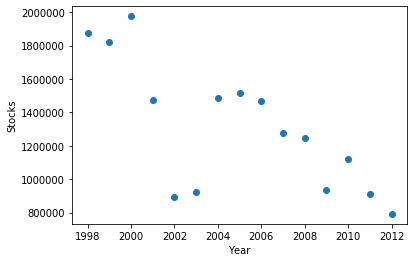

In [10]:
plt.scatter(Xs, ys)
plt.xlabel('Year')
plt.ylabel('Stocks')
plt.show()

We can see that the relationship is vaguely linear with some outliers.

Visualising the relationship between total production of honey and year.

In [11]:
prod_per_year = df.groupby('year').totalprod.mean().reset_index()
print(prod_per_year)

    year     totalprod
0   1998  5.105093e+06
1   1999  4.706674e+06
2   2000  5.106000e+06
3   2001  4.221545e+06
4   2002  3.892386e+06
5   2003  4.122091e+06
6   2004  4.456805e+06
7   2005  4.243146e+06
8   2006  3.761902e+06
9   2007  3.600512e+06
10  2008  3.974927e+06
11  2009  3.626700e+06
12  2010  4.382350e+06
13  2011  3.680025e+06
14  2012  3.522675e+06


In [12]:
X = prod_per_year['year']
X

0     1998
1     1999
2     2000
3     2001
4     2002
5     2003
6     2004
7     2005
8     2006
9     2007
10    2008
11    2009
12    2010
13    2011
14    2012
Name: year, dtype: int64

In [13]:
X = X.values.reshape(-1, 1)
X

array([[1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012]], dtype=int64)

In [14]:
y = prod_per_year['totalprod']
y

0     5.105093e+06
1     4.706674e+06
2     5.106000e+06
3     4.221545e+06
4     3.892386e+06
5     4.122091e+06
6     4.456805e+06
7     4.243146e+06
8     3.761902e+06
9     3.600512e+06
10    3.974927e+06
11    3.626700e+06
12    4.382350e+06
13    3.680025e+06
14    3.522675e+06
Name: totalprod, dtype: float64

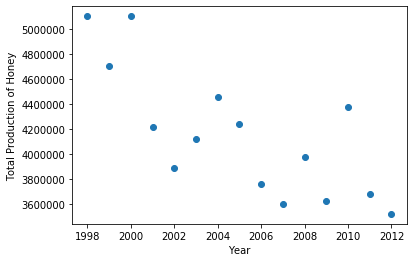

In [15]:
plt.scatter(X, y)
plt.xlabel('Year')
plt.ylabel('Total Production of Honey')
plt.show()

This plot seems to be vaguely linear and more accurate than the stocks Vs year plot. 

<h3>Training the Model </h3>

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
regr = LinearRegression()

In [18]:
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<h3>Printing Coefficients </h3>

In [19]:
print(regr.coef_)
print(regr.intercept_)

[-88303.18915238]
181208083.1073298


<h3>Making Predictions </h3>

In [20]:
y_predict = regr.predict(X)

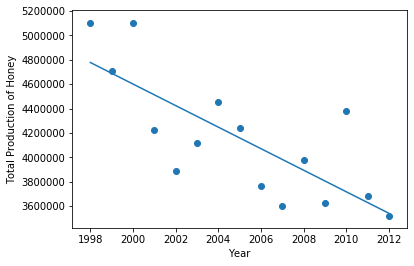

In [21]:
plt.plot(X, y_predict)
plt.scatter(X, y)
plt.xlabel('Year')
plt.ylabel('Total Production of Honey')
plt.show()

<h3>Applying the Model to predict future</h3>

In [22]:
X_future = np.array(range(2013, 2051))
X_future = X_future.reshape(-1, 1)

In [23]:
future_predict = regr.predict(X_future)

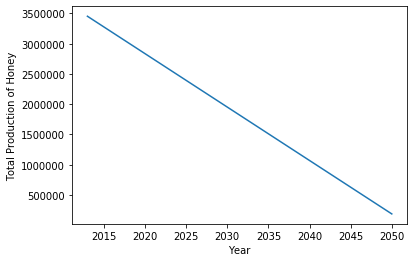

In [24]:
plt.plot(X_future, future_predict)
plt.xlabel('Year')
plt.ylabel('Total Production of Honey')
plt.show()

<h3>Conclusion </h3>

From the plot, we can conclude that honeybee production is going to decline in the forthcoming years in a linear fashion.